In [3]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 

## 이미지 이진화 (Image Thesholding)

## 기본 임계 처리
- 이진화 : 영상을 흑/백으로 분류하여 처리하는 것
  - 기준이 되는 임계값을 어떻게 결정할 것인지가 중요한 문제!
  - 임계값보다 크면 백, 작으면 흑이 되는데,  
    기본 임계처리는 사용자가 고정된 임계값을 결정하고 그 결과를 보여주는 단순한 형태
- 기본적으로 이미지의 segmenting의 가장 간단한 방법
- `cv2.threshold()`
  - Parameters  
    - `src` : input image로 single-channel 이미지.(grayscale 이미지)
    - `thresh` : 임계값
    - `maxval` : 임계값을 넘었을 때 적용할 value
    - `type` : thresholding type

  <br>

  - thresholding type
    - `cv2.THRESH_BINARY`  
      - src(x, y) > thresh 일 때, maxval

      - 그 외, 0

    - `cv2.THRESH_BINARY_INV`
      - src(x, y) > thresh 일 때, 0

      - 그 외, maxval

    - `cv2.THRESH_TRUNC`
      - src(x, y) > thresh 일 때, thresh

      - 그 외, src(x, y)

    - `cv2.THRESH_TOZERO`
      - src(x, y) > thresh 일 때, src(x, y)

      - 그 외, 0

    - `cv2.THRESH_TOZERO_INV`
      - src(x, y) > thresh 일 때, 0

      - 그 외, src(x, y)

In [4]:
img = cv2.imread('./letters.jpg', cv2.IMREAD_COLOR)

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
print(img.shape)

(426, 640)


In [7]:
ret, thresh1 = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 128, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 128, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 128, 255, cv2.THRESH_TOZERO_INV)

In [8]:
titles = ['Original', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5] 

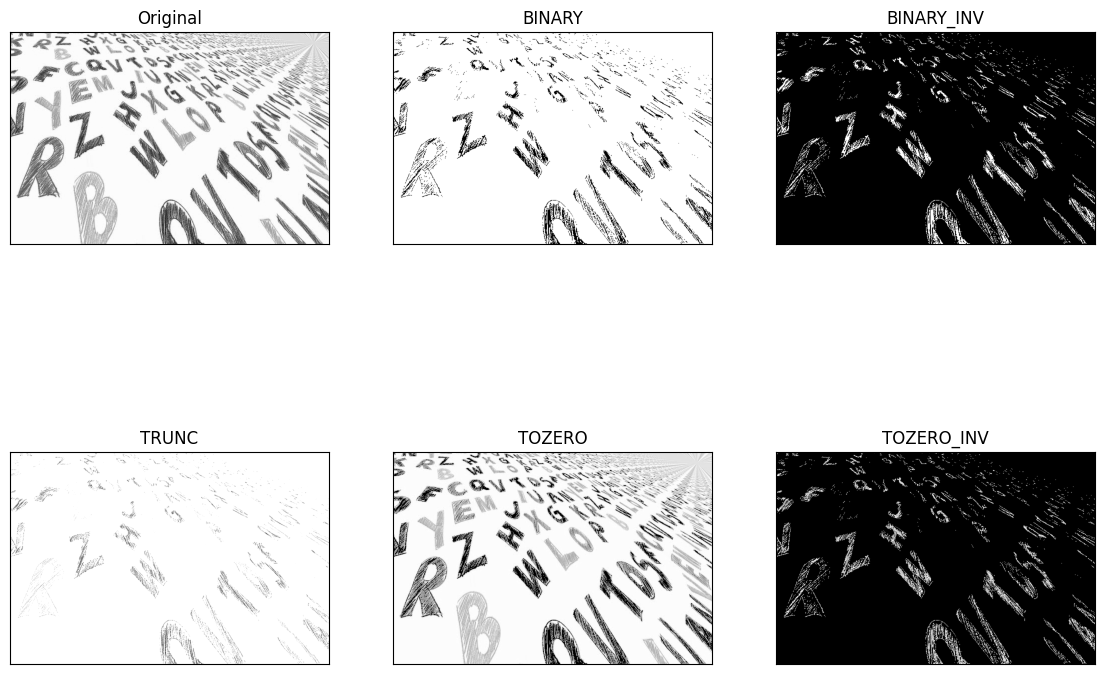

In [9]:
plt.figure(figsize=(14, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

In [10]:
snow = cv2.imread('./snow.jpg', 0)  # gary scale
snow.shape

(426, 640)

In [11]:
ret, thresh1 = cv2.threshold(snow, 128, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(snow, 128, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(snow, 128, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(snow, 128, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(snow, 128, 255, cv2.THRESH_TOZERO_INV)

In [12]:
titles = ['Original', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [snow, thresh1, thresh2, thresh3, thresh4, thresh5] 

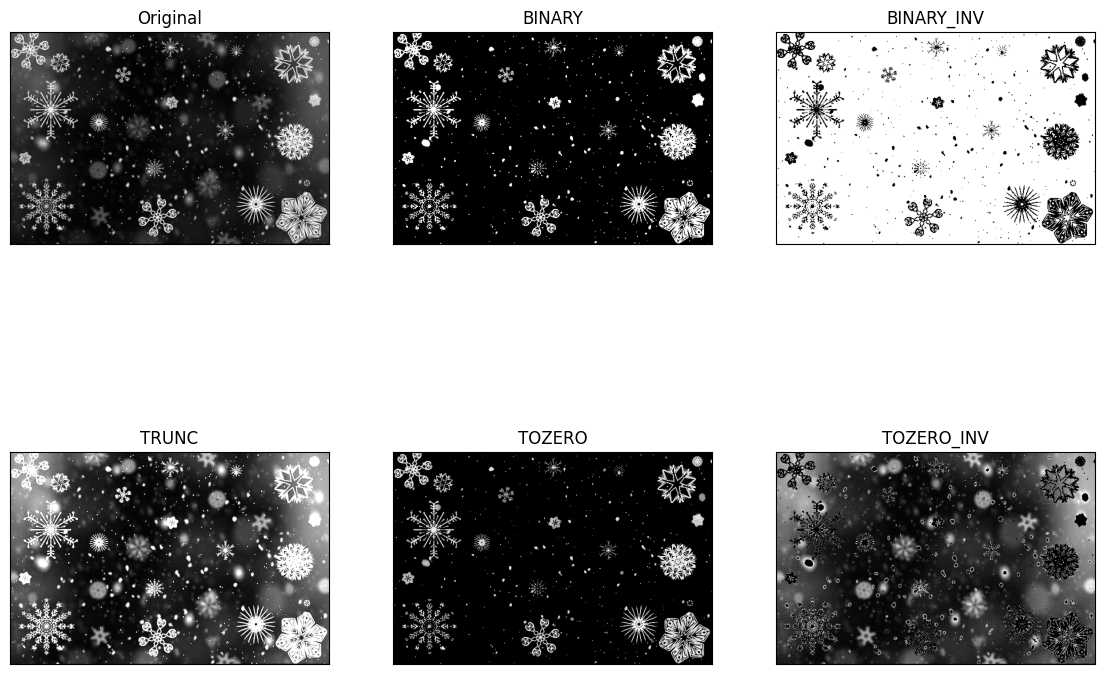

In [13]:
plt.figure(figsize=(14, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

## 적응 임계 처리
- 이전 단계에서는 임계값을 이미지 전체에 적용하여 처리하기 때문에 하나의 이미지에 음영이 다르면 일부 영역이 모두 흰색 또는 검정색으로 보여지게 됨
- 이런 문제를 해결하기 위해서 이미지의 작은 영역별로 thresholding
- `cv2.adaptiveThreshold()`
    - Parameters
      - `src` : grayscale image
      - `maxValue` : 임계값
      - `adaptiveMethod` : thresholding value를 결정하는 계산 방법
      - `blickSize` : thresholding을 적용할 영역 사이즈
      - `C` : 평균이나 가중평균에서 차감할 값
     
    - Adaptive Method
        - `cv2.APATIVE_THRESH_MEAN_C` : 주변영역의 평균값으로 결정
        - `cv2.ADAPTIVE_THRESH_GAUSSIAN_C` : 주변영역의 가우시간 값으로 설정

In [14]:
img = cv2.imread('./letters.jpg', 0)

In [15]:
ret, th1 = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

In [16]:
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)

- 시각화

In [17]:
titles = ['Original', 'Global', 'Mean', 'Gaussian']
images = [img, th1, th2, th3] 

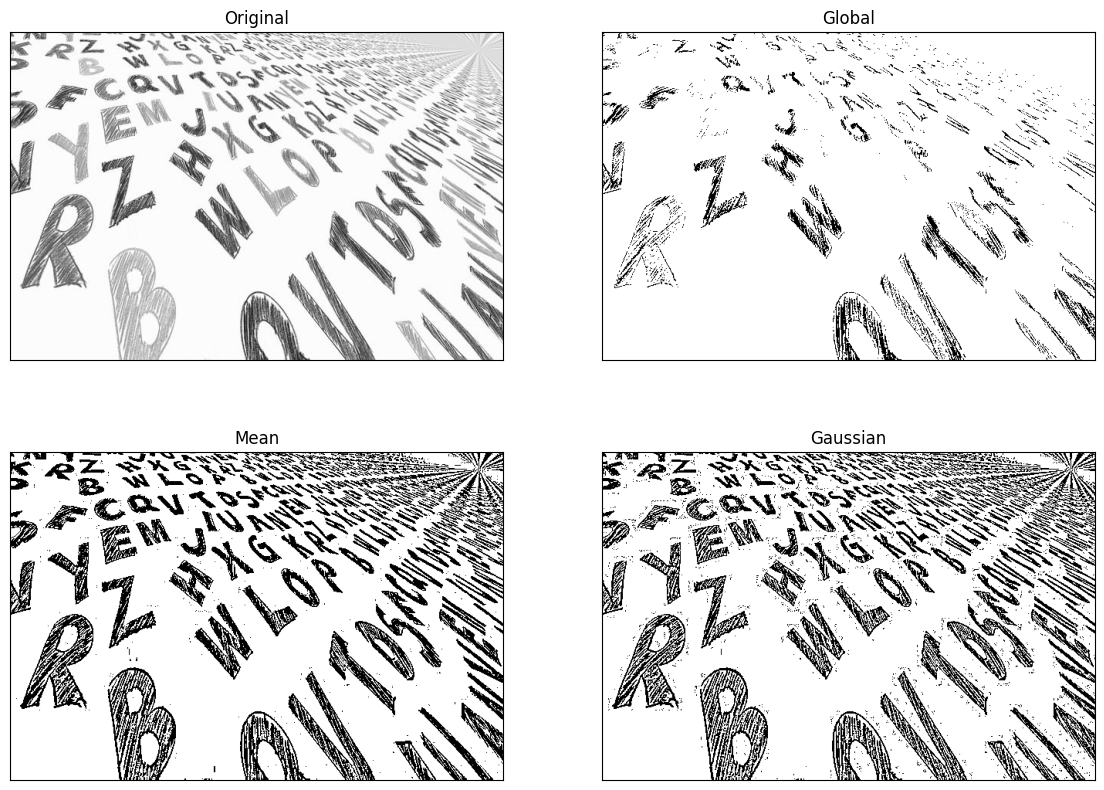

In [18]:
plt.figure(figsize=(14, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

## Otsu의 이진화
- `Otsu의 이진화`란 bimodal image에서 임계값을 자동으로 계산하는 것
- 임계값을 결정하는 가장 일반적인 방법은 trail and error 방식
- bimodal image (히스토그램으로 분석하면 2개의 peak가 있는 이미지)의 경우는 히스토그램에서 임계값을 어느정도 정확히 계산 가능
- `cv2.threshold()` 함수의 flag에 추가로 `cv2.THRESH_OTSU`를 적용. 이때 임계값은 0으로 전달

In [19]:
img = cv2.imread('./noise.jpg', 0)

In [20]:
img.shape

(360, 640)

In [21]:
ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

- 시각화

In [22]:
images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ['Original Image', 'Histogram', 'Global Thresholding',
          'Original Image', 'Histogram', 'Otsu\'s Thresholding',
          'Gaussian filltered Image', 'Histogram', 'Otus\'s Thresholding']

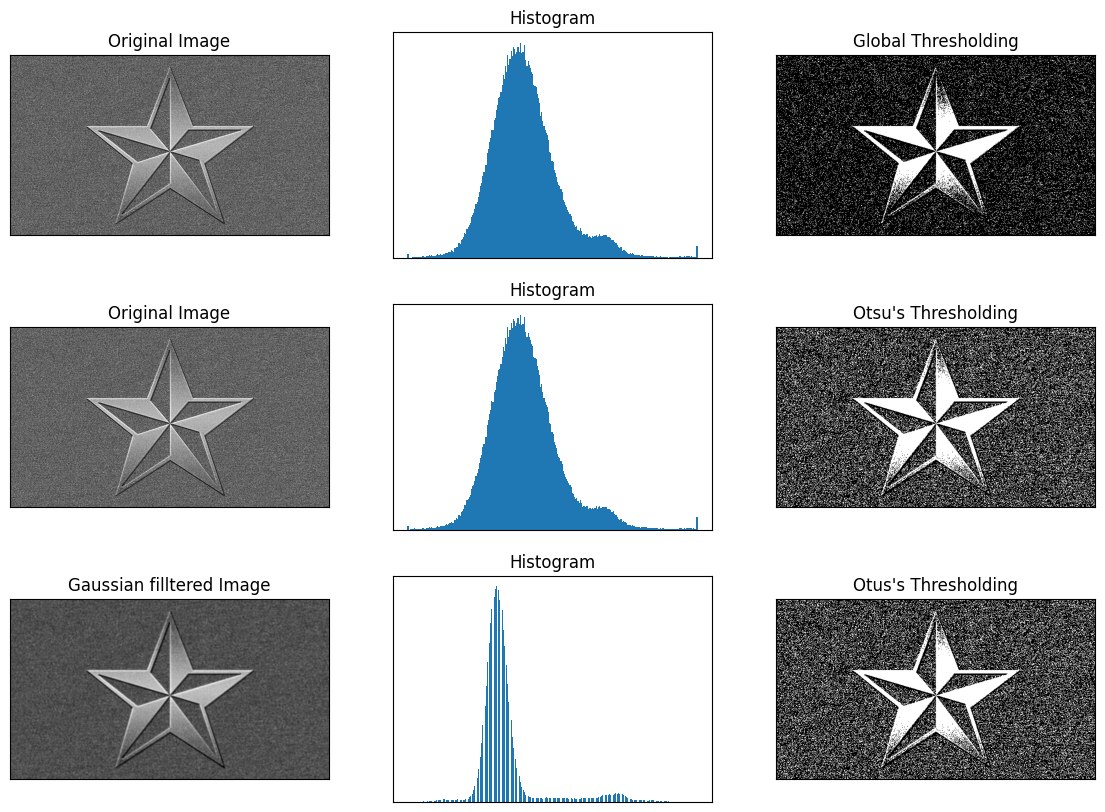

In [23]:
plt.figure(figsize=(14, 10))
for i in range(3):
    plt.subplot(3, 3, i*3+1)
    plt.imshow(images[i*3], cmap='gray')
    plt.title(titles[i*3])
    plt.xticks([]), plt.yticks([])

    plt.subplot(3, 3, i*3+2)
    plt.hist(images[i*3].ravel(), 256)
    plt.title(titles[i*3+1])
    plt.xticks([]), plt.yticks([])

    plt.subplot(3, 3, i*3+3)
    plt.imshow(images[i*3+2], cmap='gray')
    plt.title(titles[i*3+2])
    plt.xticks([]), plt.yticks([])

plt.show()